# Churn bank clients prediction: Exploratory analysis

This is a binary classification project which aims at predicting churners from the list of the bank clients. There are 3 monthly reports about the clients' financial activity and some personal info. A churner is defined as a client whose liquidity will drop by 20% in 3 month. To exclude some ordinary fluctuations it is checked that during 6 month before the drop the balance had been stable as well as 3 month after the drop.

In this notebook I am only exploring the data to get better understanding of the given features and make some hypothesis. Models and prediction are in the next notebook.

Dataset was given as one of the assignments for Advanced Analytics in a Big Data world course. Link http://seppe.net/aa/assignment1/

## 1. Data loading and preprocessing

Before starting exploratory data analysis I need to do some basic preprocessing operations like check for duplicates and missing values.

In [1]:
#importing some packages for data manipulation and plotting
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

#set random state for reproducibility of the results
random_state = 17111995

#removing any warnings from the output
import warnings
warnings.filterwarnings("ignore")

#increasing display setting so the tables do not get cropped
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

First I am loading data from the given csv files - reports on the clients activity during the three consecutive months. In the last table there is also target column I need to predict.

In [2]:
data_3 = pd.read_csv('data/train_month_3_with_target.csv', index_col='client_id') 
data_2 = pd.read_csv("data/train_month_2.csv", index_col='client_id')
data_1 = pd.read_csv("data/train_month_1.csv", index_col='client_id')

data_list = [data_3, data_2, data_1]

In all the reports we have the same clients info over time.

In [3]:
print(min(data_3.index == data_2.index))
print(min(data_3.index == data_1.index))

True
True


Let's have a first look at the data. We can divide the columns into 3 groups: **personal information** (starts with "customer_") , **financial binary** (starts with "has_") and **financial continuous** (starts with "balance_"). Two columns `visits_distinct_so` and `visits_distinct_so_areas` are count values and hard to place into any mentioned group. Let's put them into the forth group - **visit count**.

In [4]:
data_3.head()

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,has_pension_saving,has_savings_account,has_savings_account_starter,has_current_account_starter,bal_insurance_21,bal_insurance_23,cap_life_insurance_fixed_cap,cap_life_insurance_decreasing_cap,prem_fire_car_other_insurance,bal_personal_loan,bal_mortgage_loan,bal_current_account,bal_pension_saving,bal_savings_account,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_since_all,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,customer_children,customer_relationship,target
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,20,0,0,590,0,22000,0,0,1.0,1.0,1983-03,1994-08,1,1943-09,3630,9.0,0,0.0,NaN,NaN,0
4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,940,0,10570,0,0,1.0,1.0,2017-01,2017-01,1,1994-02,2460,9.0,0,NaN,mature,couple,0
f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,320,0,0,1210,0,15200,0,0,1.0,1.0,1980-12,1980-12,2,1936-10,2660,9.0,0,NaN,NaN,single,0
26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,160,0,0,0,0,29020,0,0,1.0,1.0,1998-08,2013-10,1,1946-09,6600,9.0,0,NaN,NaN,NaN,0
c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,13650,0,0,1.0,1.0,2012-11,2012-11,2,1996-04,8550,9.0,0,NaN,mature,couple,1


### 1.1 Duplicates

Just in case checking any duplicates in the data.

In [5]:
data_3[data_3.index.duplicated()]

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,has_pension_saving,has_savings_account,has_savings_account_starter,has_current_account_starter,bal_insurance_21,bal_insurance_23,cap_life_insurance_fixed_cap,cap_life_insurance_decreasing_cap,prem_fire_car_other_insurance,bal_personal_loan,bal_mortgage_loan,bal_current_account,bal_pension_saving,bal_savings_account,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_since_all,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,customer_children,customer_relationship,target
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


No duplicates in `client_id`. I am not checking other columns, as it is possible that different people have similar financial profile.

### 1.2 Missing values

In [6]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63697 entries, 910df42ad36243aa4ce16324cd7b15b0 to 977dda870c3f54df46297df3869b2907
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   homebanking_active                 63697 non-null  int64  
 1   has_homebanking                    63697 non-null  int64  
 2   has_insurance_21                   63697 non-null  int64  
 3   has_insurance_23                   63697 non-null  int64  
 4   has_life_insurance_fixed_cap       63697 non-null  int64  
 5   has_life_insurance_decreasing_cap  63697 non-null  int64  
 6   has_fire_car_other_insurance       63697 non-null  int64  
 7   has_personal_loan                  63697 non-null  int64  
 8   has_mortgage_loan                  63697 non-null  int64  
 9   has_current_account                63697 non-null  int64  
 10  has_pension_saving                 63697 non-null  int64  
 11  h

Some columns related to personal info contain missing values. The easiest option is to delete such rows for continuous variables like `customer_since_all` and `customer_since_bank` where missing values are not numerous. For categorical columns I would just create additional category for missing values.

In [7]:
data_3['customer_occupation_code'].fillna(-1, inplace=True)
data_3['customer_education'].fillna(-1, inplace=True)
data_3['customer_relationship'].fillna('Unknown', inplace = True)
data_3['customer_children'].fillna('Unknown', inplace = True)
data_3.dropna(subset=['customer_since_all', 'customer_since_bank'], inplace=True)

data_3.isna().sum().sum()

0

In [8]:
data_2 = data_2.loc[data_3.index,:]
data_1 = data_1.loc[data_3.index,:]

There is no more missing values, so we can proceed to the data exploration part.

## 2. Data exploration

For convenience I am dividing the columns into 4 groups as they differ by format and meaning. They would probably require different approaches as well.

In [9]:
binary = data_3.columns[:14]
continuous = data_3.columns[14:26]
count = data_3.columns[26:28]
personal = data_3.columns[28:38]

### 2.1 Imbalance of the data

First of all, we need to check whether the data is balanced. 

In [10]:
data_3['target'].value_counts()

0    61549
1     1899
Name: target, dtype: int64

The data is very unbalanced - the number of churners is very small and it needs to be taken into consideration otherwise a model would classify all the instances as non-churners to achieve high accuracy. Best option is to upsample using SMOTE technique.

### 2.2 Personal information about the clients

I start with the personal data of the clients (column names starting with 'customer'). As the personal data is very unlikely to change over short period of time I only take the values given in the most recent report. 

In [11]:
df_personal = data_3[personal]
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63448 entries, 910df42ad36243aa4ce16324cd7b15b0 to 977dda870c3f54df46297df3869b2907
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_since_all        63448 non-null  object 
 1   customer_since_bank       63448 non-null  object 
 2   customer_gender           63448 non-null  int64  
 3   customer_birth_date       63448 non-null  object 
 4   customer_postal_code      63448 non-null  int64  
 5   customer_occupation_code  63448 non-null  float64
 6   customer_self_employed    63448 non-null  int64  
 7   customer_education        63448 non-null  float64
 8   customer_children         63448 non-null  object 
 9   customer_relationship     63448 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 5.3+ MB


There are some issues with the data that need to be solved before plotting the graphs:

- **customer_since_all**: shows the date when the client first bought a bank or insurance product. The column needs to be transformed from dates into time period like years. 

- **customer_since_bank**: shows the date when the client first bought a bank product. I also need to transform the column from dates into time period like years. Might be highly correlated with **customer_since_all** variable.

- **customer_gender**: encoded 1 for male and 2 for female. Not an issue for ensemble models. But might be a good practice to encode as 0-1.

- **customer_birth_date**: shows the birth date of the client. I need to transform the column from dates into time period like years.

- **customer_postal_code**: the column needs transformation since it cannot be treated as continuous and changing it into categorical variable would result into too many categories. 

- **customer_occupation_code**: not much information about the process of encoding. Needs a format change from float to int.

- **customer_self_employed**: 0 for not self-employed and 1 for self-employed. No obvious issues with the column.

- **customer_education**: no information on the coding process. Needs a format change from float to int.

- **customer_children**: categorical variable describing family situation. It might be a good option to transform the column into more simple category value - 'no children' or 'one and more children'. Very unlikely that the age and number of children can influence the decision of the client to leave the bank.  Missingness might be a good feature showing that a client does not want to disclose personal information as he or she plans to leave the bank.

- **customer_relationship**: there are 3 groups: single, couple and unknown.



Below I write `date_to_year` function which transforms the date format columns into year/age.

In [12]:
#function to transform date to years (reference year is 2018)
def date_to_year(var):
    var = pd.to_datetime(var)
    var = 2018 - var.dt.year
    return var
    
#transforming columns with date to age/period of years
date_col = ['customer_birth_date', 'customer_since_all', 'customer_since_bank']
df_personal[date_col] = df_personal[date_col].apply(date_to_year)

df_personal.head()

,customer_since_all,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,customer_children,customer_relationship
client_id,,,,,,,,,,
910df42ad36243aa4ce16324cd7b15b0,35,24,1,75,3630,9.0,0,0.0,Unknown,Unknown
4e19dc3a54323c5bbfc374664b950cd1,1,1,1,24,2460,9.0,0,-1.0,mature,couple
f5d08db1b86c0cb0f566bf446cff1fb4,38,38,2,82,2660,9.0,0,-1.0,Unknown,single
26170ecf63653e215c52f4262c1c4859,20,5,1,72,6600,9.0,0,-1.0,Unknown,Unknown
c078009957dffb64f20e61b41220a976,6,6,2,22,8550,9.0,0,-1.0,mature,couple


Changing some float columns into integer.

In [13]:
float_cols = ['customer_occupation_code', 'customer_education']
df_personal[float_cols] = df_personal[float_cols].astype('int64')
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63448 entries, 910df42ad36243aa4ce16324cd7b15b0 to 977dda870c3f54df46297df3869b2907
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_since_all        63448 non-null  int64 
 1   customer_since_bank       63448 non-null  int64 
 2   customer_gender           63448 non-null  int64 
 3   customer_birth_date       63448 non-null  int64 
 4   customer_postal_code      63448 non-null  int64 
 5   customer_occupation_code  63448 non-null  int64 
 6   customer_self_employed    63448 non-null  int64 
 7   customer_education        63448 non-null  int64 
 8   customer_children         63448 non-null  object
 9   customer_relationship     63448 non-null  object
dtypes: int64(8), object(2)
memory usage: 5.3+ MB


In [14]:
df_personal.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_since_all,63448.0,18.765367,11.365607,0.0,10.0,19.0,26.0,63.0
customer_since_bank,63448.0,16.120051,11.014654,0.0,6.0,16.0,24.0,50.0
customer_gender,63448.0,1.486887,0.499832,1.0,1.0,1.0,2.0,2.0
customer_birth_date,63448.0,56.580822,20.054854,18.0,41.0,58.0,73.0,154.0
customer_postal_code,63448.0,5577.777471,3020.259071,0.0,2650.0,4880.0,8750.0,9992.0
customer_occupation_code,63448.0,8.468762,2.031697,-1.0,9.0,9.0,9.0,9.0
customer_self_employed,63448.0,0.086843,0.281607,0.0,0.0,0.0,0.0,1.0
customer_education,63448.0,-0.099215,1.705630,-1.0,-1.0,-1.0,0.0,6.0


There are some too large age values in the report. It is probably some mistakes made when data was inserted in the report. Such moments need clarification with the bank managers. As I do not have such opportunity, I am going to delete instances with age more than 100. 

In [15]:
df_personal = df_personal[df_personal['customer_birth_date']<=100]

Now I am adding the target value and plotting the univariate distribution of the vairables. 

In [16]:
df_personal['target'] = data_3.loc[df_personal.index, 'target']

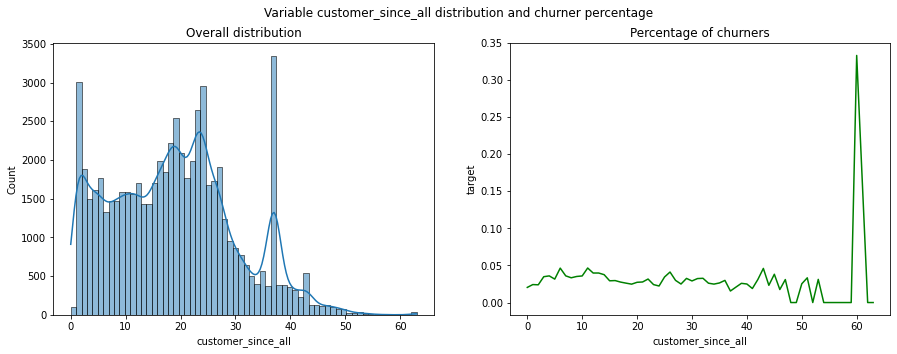

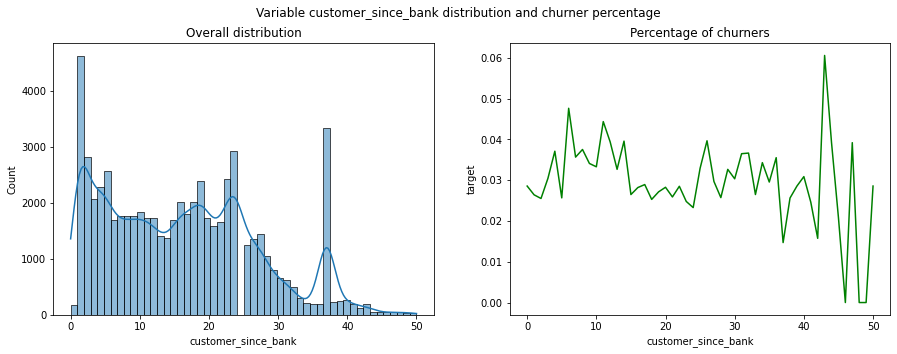

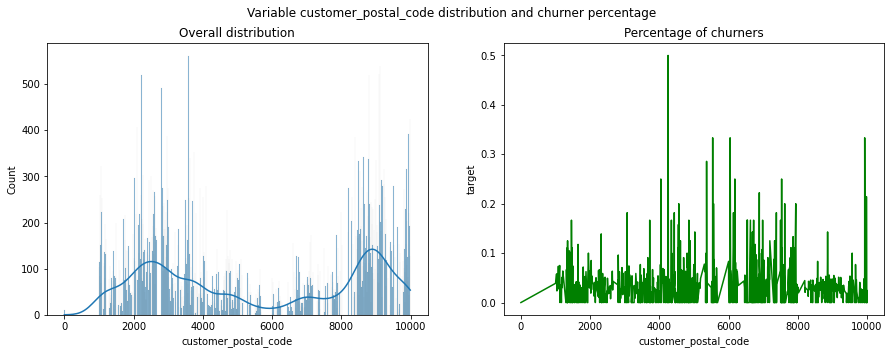

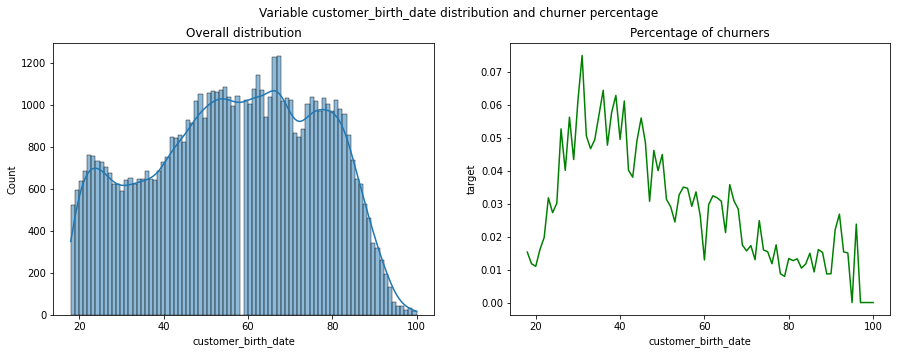

In [17]:
hist_cols = ['customer_since_all', 'customer_since_bank', 'customer_postal_code', 'customer_birth_date']

for i in hist_cols:
    n_bins = df_personal[i].nunique()+1
    
    fig, axes = plt.subplots(1,2, sharex = True, figsize = (15,5))
    fig.suptitle('Variable ' + str(i) + ' distribution and churner percentage' )
    sns.histplot(ax = axes[0], x = df_personal[i], bins = n_bins, kde = True)
    axes[0].set_title('Overall distribution')
    
    mean_by_col = df_personal[[i, 'target']].groupby(by = i).mean()
    sns.lineplot(ax = axes[1], x = mean_by_col.index, y = mean_by_col['target'], color = 'green')
    axes[1].set_title('Percentage of churners')

Distribution plots of personal info columns can give us some insight about the data. Plotting the variable distribution for the target groups and comparing is not very representative as the data is very unbalanced. So I also look into mean of the target value with regard to the given variable.

First graphs show distribution of  `customer_since_all` and `customer_since_bank` variables. The distribution is highly skewed - there are not so many clients who use the bank services for more than 25-30 years. We can also see a splash of clients who first came to the bank about 35-36 years ago. This splash is certainly is not accidental, as it appears in both graphs. Probably, some sucessfull ad campaign which attracted many new clients. The target mean does not show any consistent trend, we have pretty stable percent of churners for most of the clients. Variablility for very loyal clients (40 and more years) is caused by the small number of such instances.

Plotting `customer_postal_code` itself does not give much information. We can see high numbers for postal offices located in  highly populated cities. However, comparing the graphs with regard to the target value shows some difference - some cities struggle a lot from clients leaving the bank. So I will replace the postal codes with the relative percentage of churners in the city. To avoid data leakage while building models, I would calculate the percentage only from the training data. 

Finally, `customer_birth_date` plot shows that young people are slightly more likely to change banks than elder people. However, the difference is not drastique. From the histogram of the variable we can see that the number of clients younger than 40 years is smaller compared to the 40-60 age group. So I would not claim there is a strong influence of the age factor on the churn prediction.

Below I am using target encoding for `customer_postal_code`:

In [18]:
target_enc = df_personal.groupby('customer_postal_code')['target'].mean()
df_personal['customer_postal_code'] = df_personal['customer_postal_code'].map(target_enc)

Next step is categorical variables. I am using barplot instead of histograms for better representation.

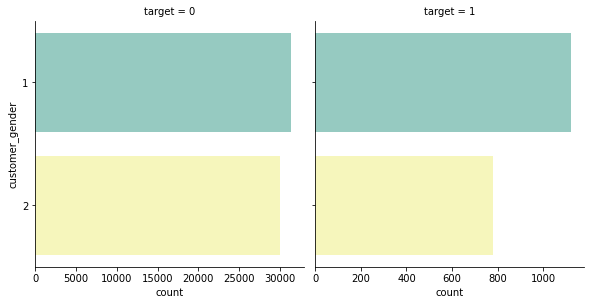

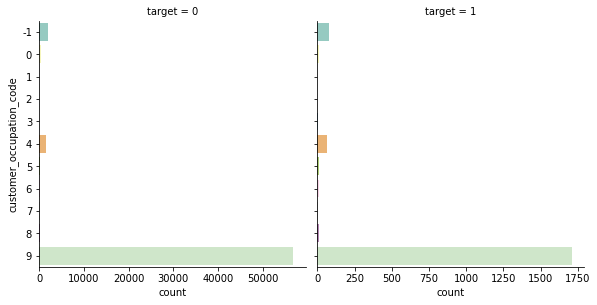

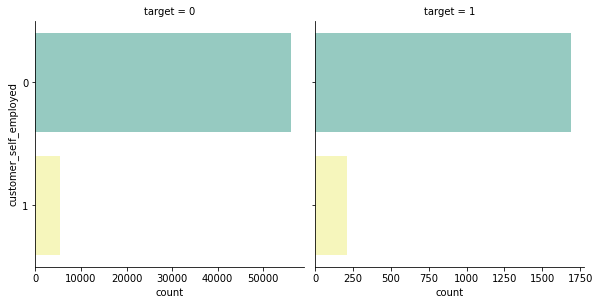

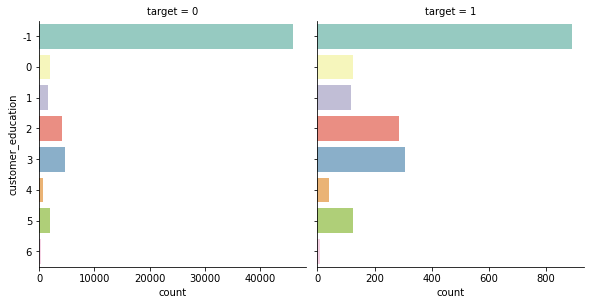

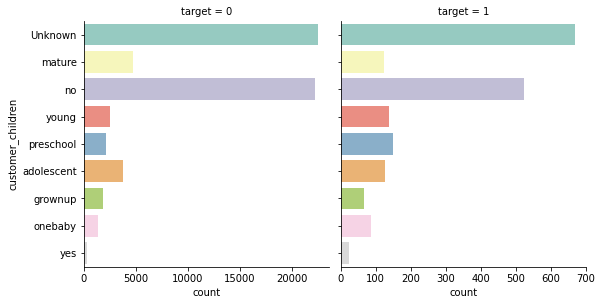

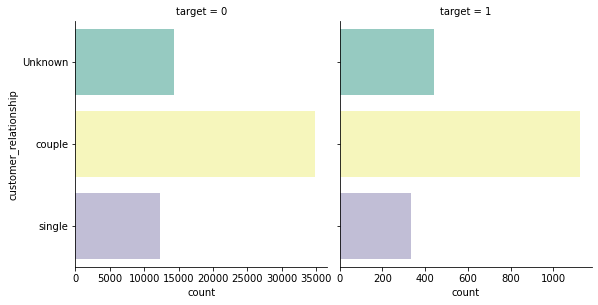

In [19]:
bar_cols = ['customer_gender', 'customer_occupation_code', 'customer_self_employed', 'customer_education', 'customer_children', 
            'customer_relationship']

for i in bar_cols:
    g = sns.catplot(y = i, col = 'target', data=df_personal, kind = 'count', sharex = False, palette = 'Set3')
    g.fig.set_figheight(4)
    g.fig.set_figwidth(8)

Barplots show some relative difference between non-churners and churners for most of the categorical factors.

Column `customer_gender` shows some slight difference between two groups. Female clients are less likely to be churners compared to male. Next feature`customer_occupation_code` is very unbalanced. Most observation belong to group 9. Slight difference between groups is visible for `customer_self_employed`. Self-emplyed clients are a little bit more likely to become churners. More distinct differences are presented for `customer_eduction`. Suprisingly, clients who disclosed their education info tend to stop using the bank services. It looks like `customer_children` feature might also contribute to the classification. In relative terms, clients without children are less likely to be churners. Interestingly, single people are also more likely to stay loyal to the bank. Probably, the bank competitors offer better conditions for clients with family.

For further analysis, all categorical columns are going to be encoded using dummy variables.

In [20]:
df_personal = pd.get_dummies(df_personal, columns = bar_cols, drop_first=True)
df_personal.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_since_all,63319.0,18.753044,11.364296,0.0,10.000000,19.000000,26.000000,63.0
customer_since_bank,63319.0,16.102971,11.010043,0.0,6.000000,16.000000,24.000000,50.0
customer_birth_date,63319.0,56.469559,19.915749,18.0,41.000000,58.000000,73.000000,100.0
customer_postal_code,63319.0,0.029991,0.023307,0.0,0.017241,0.026975,0.040816,0.5
target,63319.0,0.029991,0.170564,0.0,0.000000,0.000000,0.000000,1.0
customer_gender_2,63319.0,0.486552,0.499823,0.0,0.000000,0.000000,1.000000,1.0
customer_occupation_code_0,63319.0,0.006601,0.080982,0.0,0.000000,0.000000,0.000000,1.0
customer_occupation_code_1,63319.0,0.000379,0.019465,0.0,0.000000,0.000000,0.000000,1.0
customer_occupation_code_2,63319.0,0.000111,0.010514,0.0,0.000000,0.000000,0.000000,1.0
customer_occupation_code_3,63319.0,0.000158,0.012566,0.0,0.000000,0.000000,0.000000,1.0


### 2.2 Financial binary features

Next block of columns I am studying is related to the financial activity of the clients. I start with binary columns which show whether a client has or has not particular bank and insurance products.

In [21]:
df_binary = data_3.loc[df_personal.index , binary]
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63319 entries, 910df42ad36243aa4ce16324cd7b15b0 to 977dda870c3f54df46297df3869b2907
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   homebanking_active                 63319 non-null  int64
 1   has_homebanking                    63319 non-null  int64
 2   has_insurance_21                   63319 non-null  int64
 3   has_insurance_23                   63319 non-null  int64
 4   has_life_insurance_fixed_cap       63319 non-null  int64
 5   has_life_insurance_decreasing_cap  63319 non-null  int64
 6   has_fire_car_other_insurance       63319 non-null  int64
 7   has_personal_loan                  63319 non-null  int64
 8   has_mortgage_loan                  63319 non-null  int64
 9   has_current_account                63319 non-null  int64
 10  has_pension_saving                 63319 non-null  int64
 11  has_savings_account        

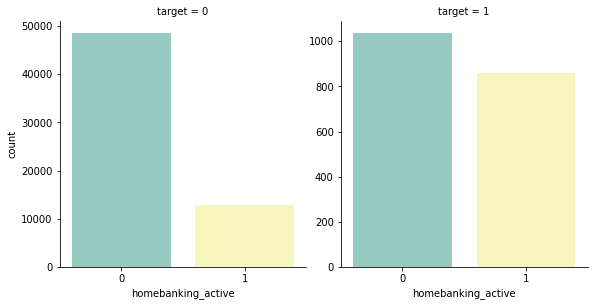

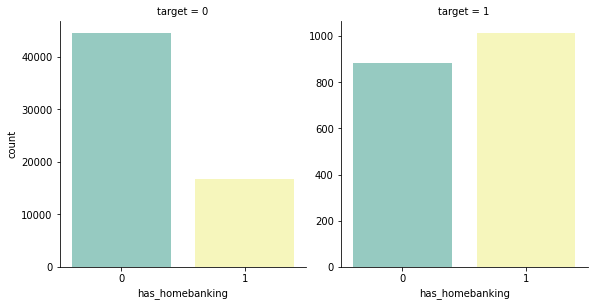

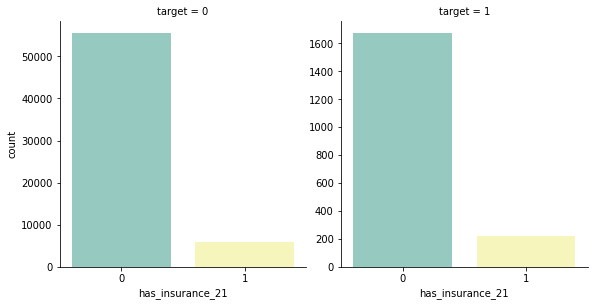

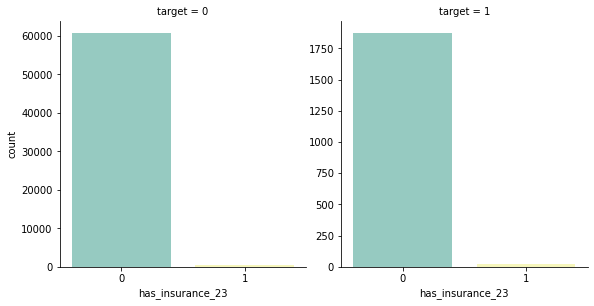

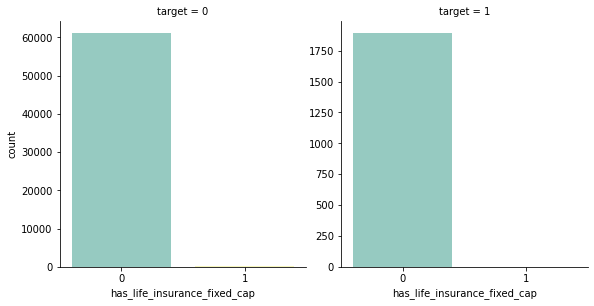

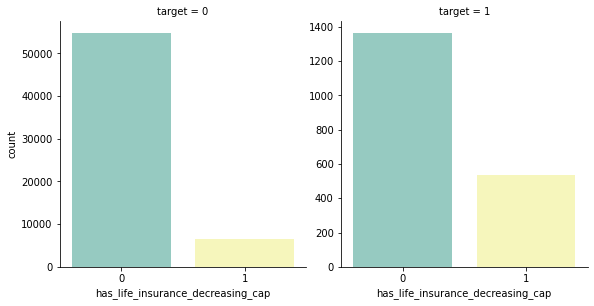

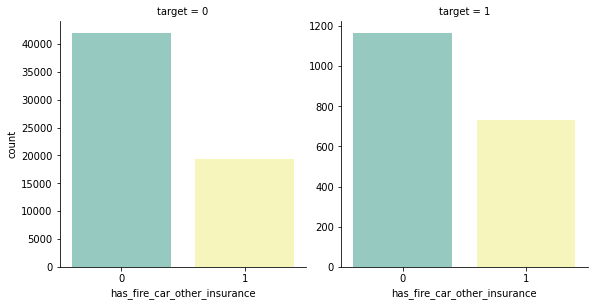

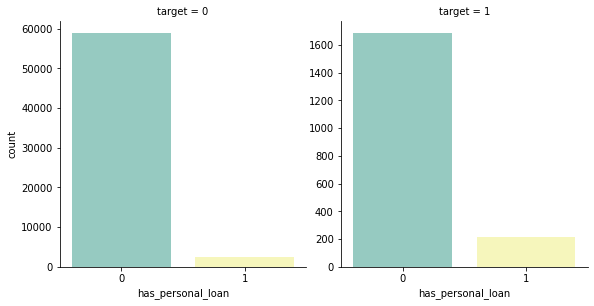

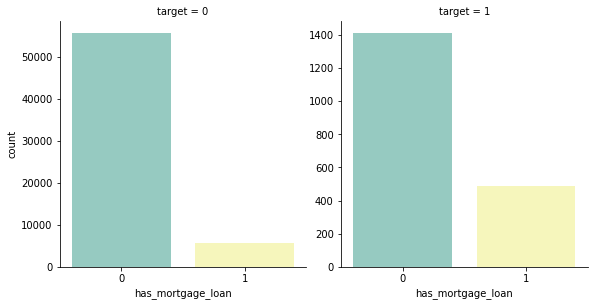

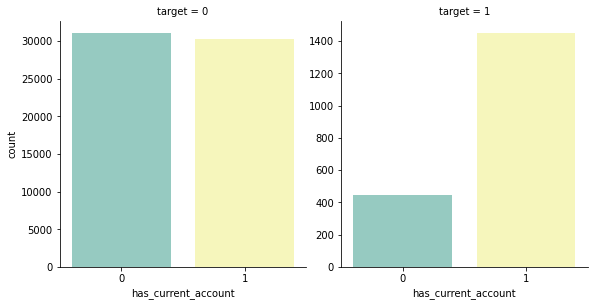

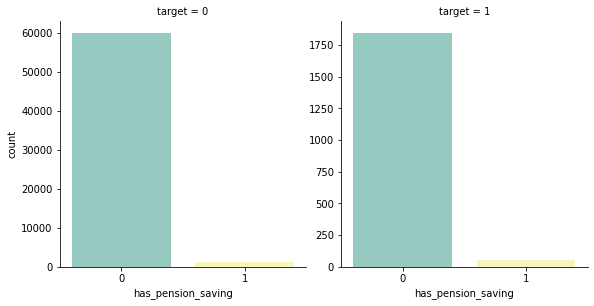

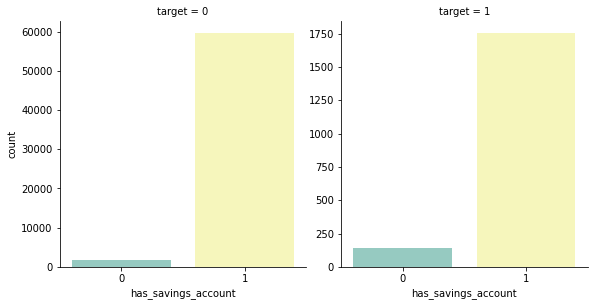

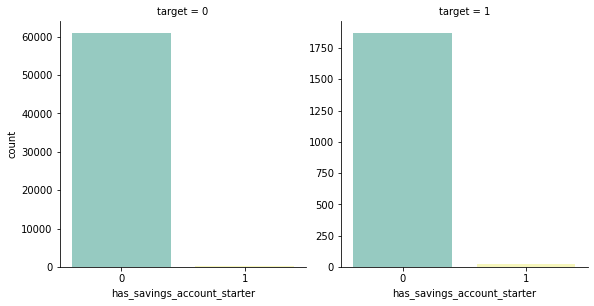

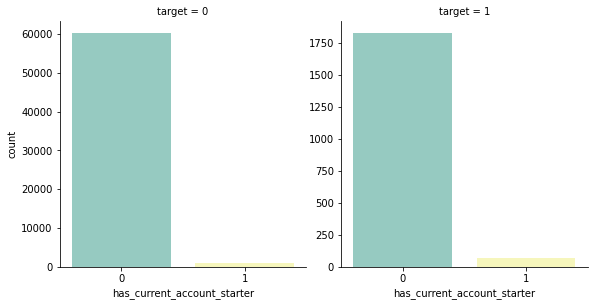

In [22]:
df_binary['target'] = df_personal['target']

for i in binary:
    g = sns.catplot(x = i, col = 'target', data = df_binary, kind = 'count', sharey = False, palette = 'Set3')
    g.fig.set_figheight(4)
    g.fig.set_figwidth(8)

Some of the binary features are very zero inflated, but it is not a problem if the ones have predictive power. From the graphs we can see that many features have different proportions for churners and non-churners, especially `has_homebanking`,  `has_mortgage_loan`, `has_current_account` and `homebanking_active`, but the major problem is whether the binary variables add additional information to the continuous variables. For example, if a person does not have a current account, they would have zero as balance and if a balance is different from 0, then they apparently have an account. The only issue might be that a person has an account but there is no money on the account. 

We have binary columns for all 3 time points, so we concatinate them into one dataset.

In [23]:
df_binary_full = pd.concat([df_binary.drop('target', axis=1), data_2[binary].add_suffix('_2'), data_1[binary].add_suffix('_1')],
                           axis=1, join='inner')

### 2.3 Financial continuous features

Probably the most informative block of the features for classification - continuous financial data. This data is basically used to identify a churner.

In [24]:
df_continuous = data_3.loc[df_personal.index, continuous]
df_continuous.describe().T

,count,mean,std,min,25%,50%,75%,max
bal_insurance_21,63319.0,458.414694,1642.773598,0.0,0.0,0.0,0.0,10000.0
bal_insurance_23,63319.0,47.560290,537.161640,0.0,0.0,0.0,0.0,9890.0
cap_life_insurance_fixed_cap,63319.0,78.437752,2545.659359,0.0,0.0,0.0,0.0,220000.0
cap_life_insurance_decreasing_cap,63319.0,11613.574914,40317.307303,0.0,0.0,0.0,0.0,780000.0
prem_fire_car_other_insurance,63319.0,183.414299,368.365166,0.0,0.0,0.0,240.0,3000.0
bal_personal_loan,63319.0,403.076802,2664.658163,0.0,0.0,0.0,0.0,71690.0
bal_mortgage_loan,63319.0,8896.602757,35595.241163,0.0,0.0,0.0,0.0,490000.0
bal_current_account,63319.0,1324.435635,2685.581521,-1000.0,0.0,0.0,1520.0,20000.0
bal_pension_saving,63319.0,233.954421,2141.059109,0.0,0.0,0.0,0.0,41170.0
bal_savings_account,63319.0,17887.438526,11755.669417,0.0,8460.0,15170.0,25500.0,50000.0


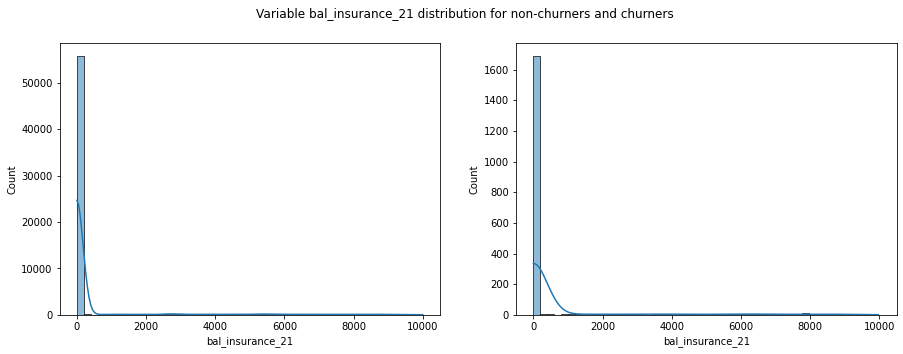

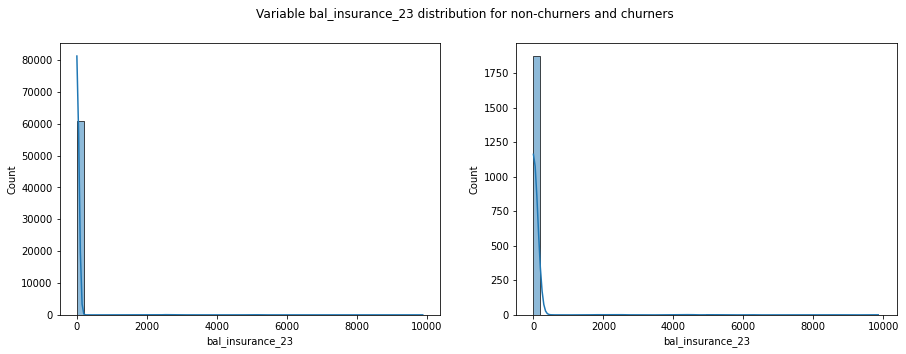

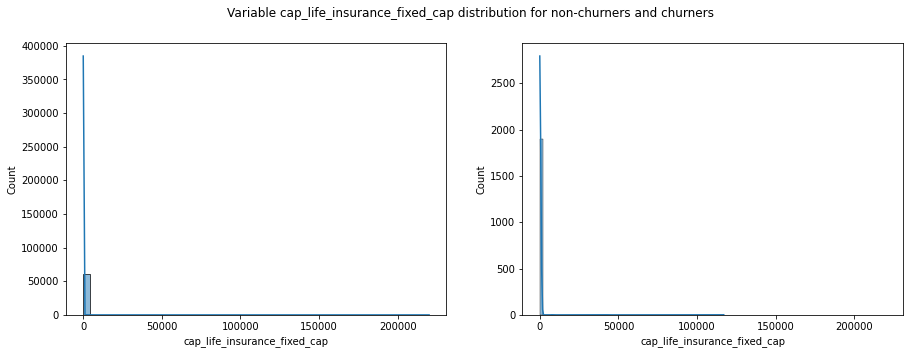

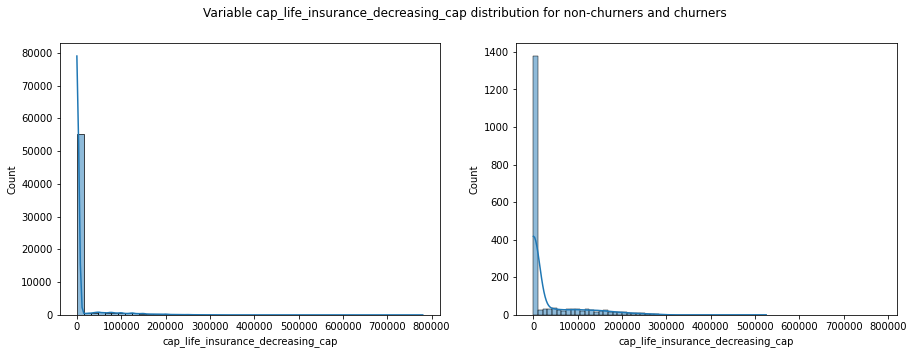

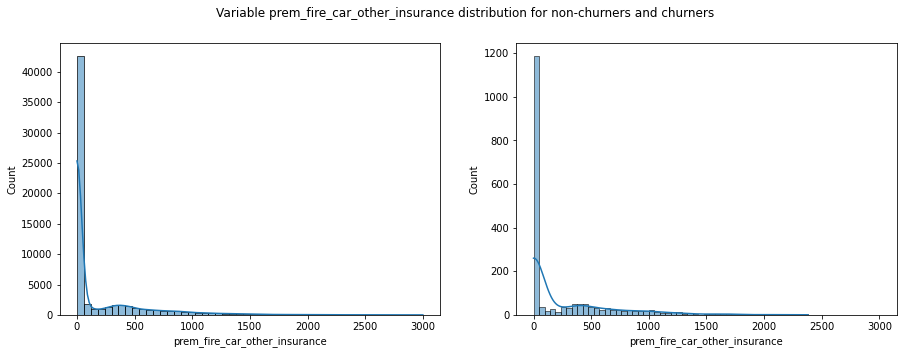

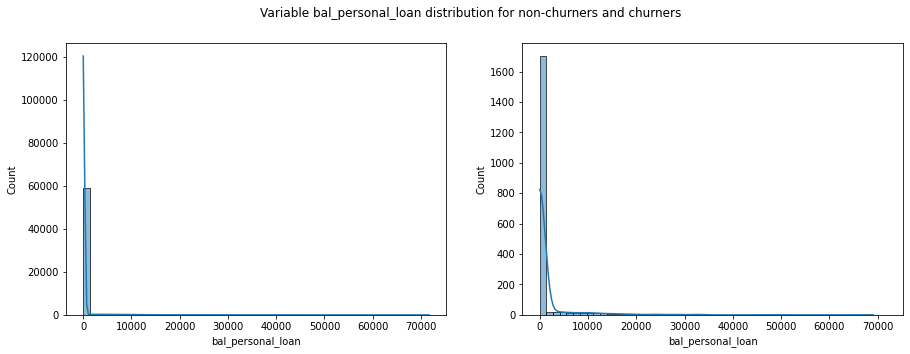

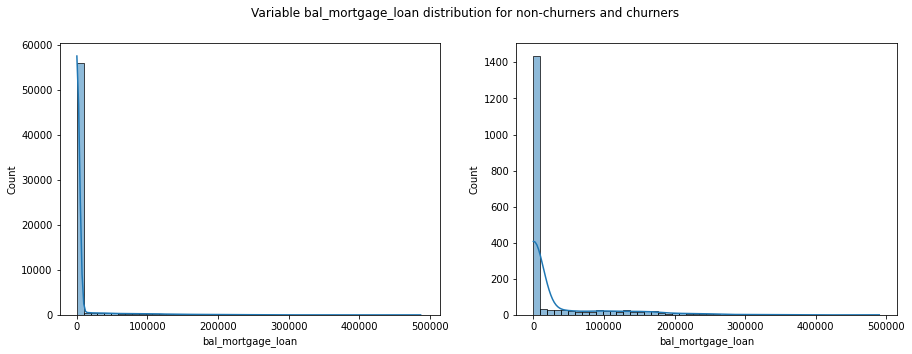

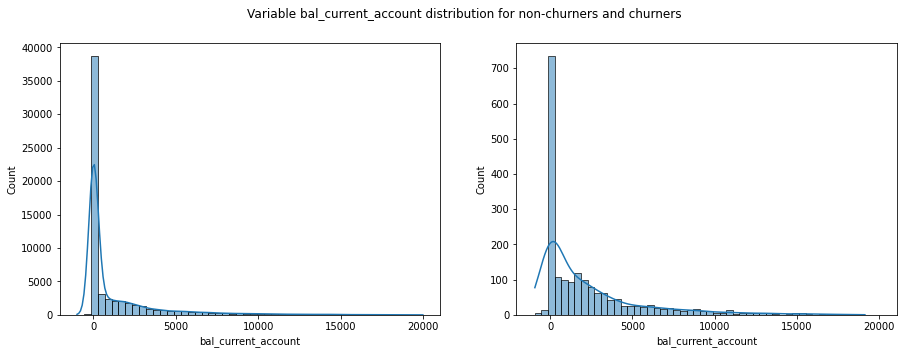

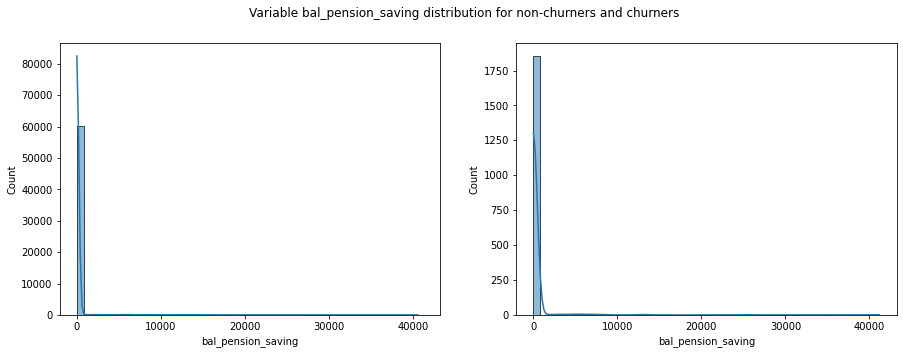

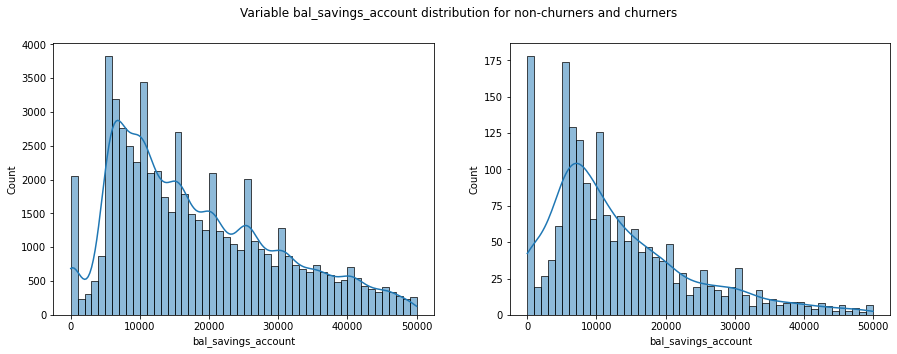

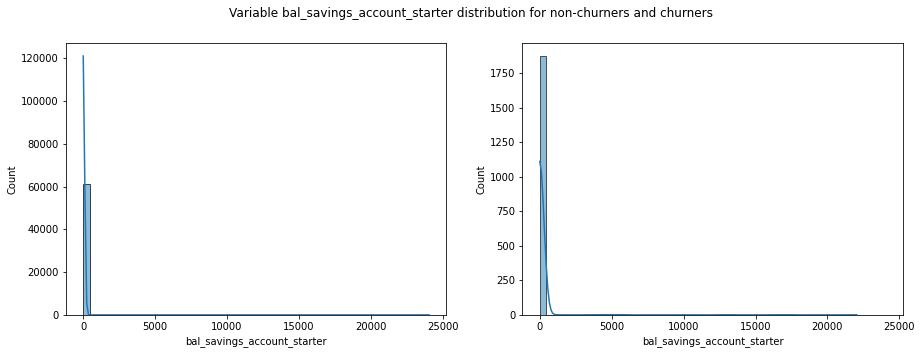

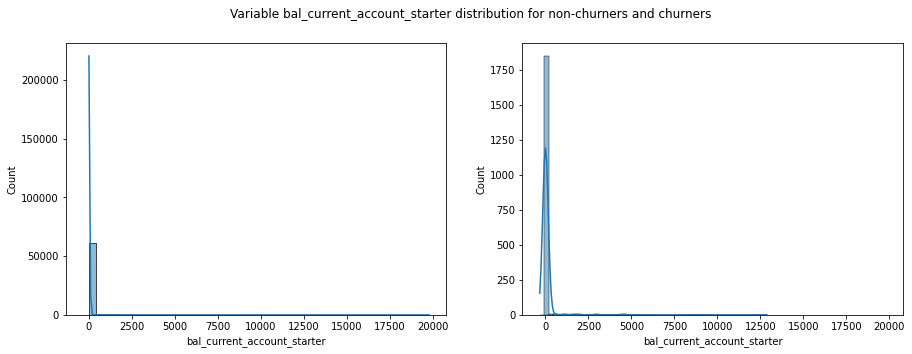

In [25]:
df_continuous['target'] = df_personal['target']

for i in continuous:
    fig, axes = plt.subplots(1,2, sharex = True, figsize = (15,5))
    fig.suptitle('Variable ' + str(i) + ' distribution for non-churners and churners' )
    sns.histplot(ax = axes[0], x = df_continuous[df_continuous['target']==0][i], bins = 50,kde = True)
    sns.histplot(ax = axes[1], x = df_continuous[df_continuous['target']==1][i], bins = 50,kde = True)

The variables are very zero inflated. Only `bal_savings_account` show different distribution from other features.

Let's check the multicollinearity of the variables:

<AxesSubplot:>

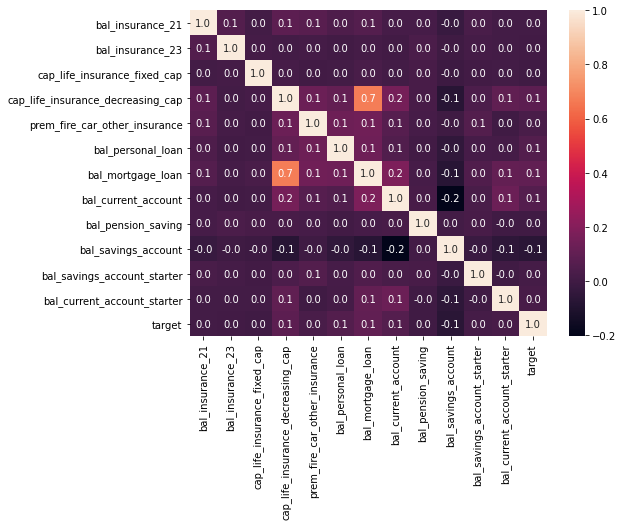

In [26]:
plt.figure(figsize = (8, 6))
sns.heatmap(df_continuous.corr(), annot = True, fmt = '.1f')

There is pretty strong correlation between `bal_mortgage_loan` and `cap_life_insurance_fixed_cap` variables. We need to take this into consideration when choosing model.

### 2.4 Count variables

There are 2 variables that a bit differ from others so I am putting them in a separate subsection to explore.

In [27]:
df_count = data_3.loc[df_personal.index, count].astype('int')
df_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63319 entries, 910df42ad36243aa4ce16324cd7b15b0 to 977dda870c3f54df46297df3869b2907
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   visits_distinct_so        63319 non-null  int32
 1   visits_distinct_so_areas  63319 non-null  int32
dtypes: int32(2)
memory usage: 989.4+ KB


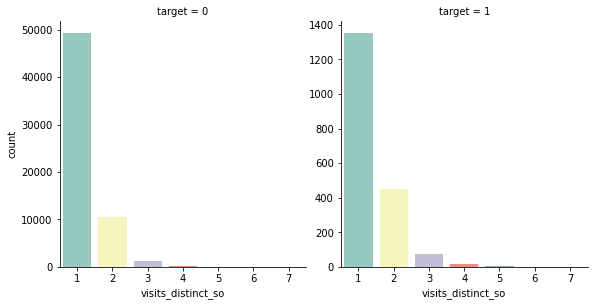

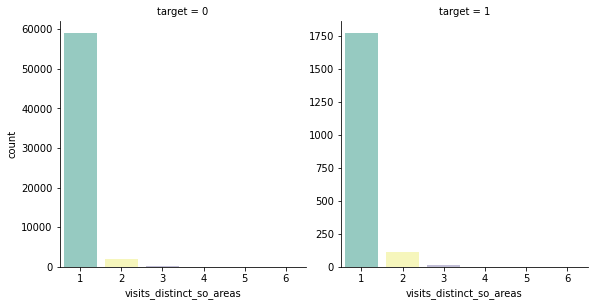

In [28]:
df_count['target'] = df_personal['target']

for i in count:
    g = sns.catplot(x = i, col = 'target', data=df_count, kind = 'count', sharey = False, palette = 'Set3')
    g.fig.set_figheight(4)
    g.fig.set_figwidth(8)

Most people just visit the same sales office at the same area. If a client has been visiting different offices in different areas, there are higher chances that this person is a potential churner.

In [29]:
df_count[count].corr()

,visits_distinct_so,visits_distinct_so_areas
visits_distinct_so,1.000000,0.509972
visits_distinct_so_areas,0.509972,1.000000


There is definitely some correlation between the variables, but it is not significant to reduce the performance of the models. 

## 3. Feature engineering

All features except personal information are given three times. We can transform the longitudinal data and get additional  information about change of the client's financial behaviour. I am going to calculate the relative change over time so for each feature there would be 3 columns: the most recent (original data), relative change of the third month compared to the previous (second) month and relative change of the second month compared to the first month. For convenience I will write a function:

In [30]:
#function to calculte the variation over time
def percent_change(col1, col2):
    col3 = [0 for i in range(len(col1))]
    for i in range(len(col1)):
        if col1[i]==0:
            if col2[i]==0:
                col3[i]=0
            else:
                col3[i]=1
        else:
            col3[i] = (col2[i]-col1[i])/col1[i]
    return col3

Now we can apply the function for both periods and merge all the tables into one dataset.

In [31]:
non_personal = [*continuous, *count]

data_2 = data_2.loc[df_personal.index,non_personal]
data_1 = data_1.loc[df_personal.index,non_personal]

def variation(data1, data2, cols):
    change_2vs1 = pd.DataFrame(columns = cols, index = data1.index)
    for i in cols:
        change_2vs1[i] = percent_change(data1[i], data2[i]) 
    return change_2vs1

data_1_var = variation(data_1, data_2, non_personal)
data_2_var = variation(data_2, data_3, non_personal)

data_var = pd.concat([df_continuous.drop('target', axis=1), df_count.drop('target', axis=1), data_2_var.add_suffix('_2'), 
                      data_1_var.add_suffix('_1')], axis=1)

In [32]:
data_var.describe().T

,count,mean,std,min,25%,50%,75%,max
bal_insurance_21,63319.0,458.414694,1642.773598,0.000000,0.000000,0.0,0.000000,10000.000000
bal_insurance_23,63319.0,47.560290,537.161640,0.000000,0.000000,0.0,0.000000,9890.000000
cap_life_insurance_fixed_cap,63319.0,78.437752,2545.659359,0.000000,0.000000,0.0,0.000000,220000.000000
cap_life_insurance_decreasing_cap,63319.0,11613.574914,40317.307303,0.000000,0.000000,0.0,0.000000,780000.000000
prem_fire_car_other_insurance,63319.0,183.414299,368.365166,0.000000,0.000000,0.0,240.000000,3000.000000
bal_personal_loan,63319.0,403.076802,2664.658163,0.000000,0.000000,0.0,0.000000,71690.000000
bal_mortgage_loan,63319.0,8896.602757,35595.241163,0.000000,0.000000,0.0,0.000000,490000.000000
bal_current_account,63319.0,1324.435635,2685.581521,-1000.000000,0.000000,0.0,1520.000000,20000.000000
bal_pension_saving,63319.0,233.954421,2141.059109,0.000000,0.000000,0.0,0.000000,41170.000000
bal_savings_account,63319.0,17887.438526,11755.669417,0.000000,8460.000000,15170.0,25500.000000,50000.000000


All the columns have been explored and preprocessed. But we end up with a large number of variables, so I will try reduce dimensionality using UMAP technique.

## Dimensionality reduction

In [33]:
import umap
import umap.plot
from sklearn.preprocessing import StandardScaler

In [34]:
data_full = pd.concat([data_var, df_personal, df_binary_full], axis=1)
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63319 entries, 910df42ad36243aa4ce16324cd7b15b0 to 977dda870c3f54df46297df3869b2907
Columns: 118 entries, bal_insurance_21 to has_current_account_starter_1
dtypes: float64(29), int32(2), int64(58), uint8(29)
memory usage: 44.7+ MB


The complete tables has 118 columns: 117 features and one target variable. That's not more than the number of instances that we have but still is not very convenient and time consuming analysing such large data frame. So I am reducing the number of features to 2 using UMAP technique.

First of all, I am standardizing the data.

In [35]:
scaler = StandardScaler()
data_st = scaler.fit_transform(data_full.drop('target', axis=1))
y = data_full['target']

Now I can apply umap to reduce the dimension to 2 

In [87]:
%time embedding = umap.UMAP(n_neighbors = 50, n_components=2, random_state=random_state).fit_transform(data_st, y)

CPU times: total: 4min 14s
Wall time: 2min 9s


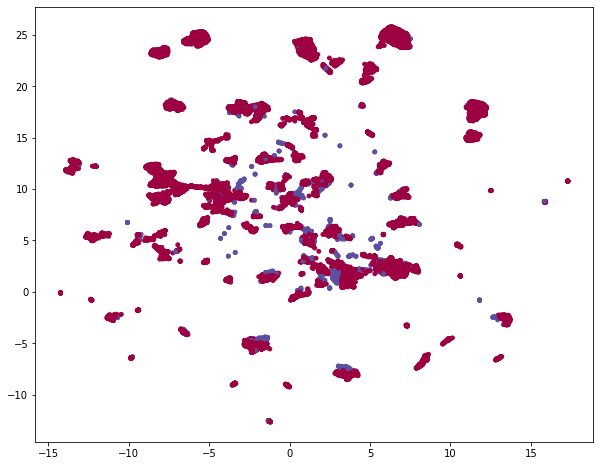

In [88]:
plt.figure(figsize=(10,8))
plt.scatter(embedding[:, 0], embedding[:,1], c = y, cmap='Spectral', s=15)

## Conclusion

Exploratory analysis of the data gives some insights about which clients are potential churners. For example, family status of a person seems to have some influence on the decision to leave the bank, which was unexpected for me. 

I also get better understanding how I need to preprocess data to start building models. I will build a pipeline with all the important steps so it can be applied to train and test datasets. The steps are:

1. 